# Day 2

* Grid Plots
* Exercises
* Projects
* Styles and aesthetics

## Review

* [Seaborn API][1] and [User Guide][2]
* Axes vs Grid plots
* `sns.plotting_func(x='col1', y='col2', data=df, hue='col3')`
* Open Seaborn Cheat Sheet


[1]: http://seaborn.pydata.org/api.html
[2]: https://seaborn.pydata.org/tutorial.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)

diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(3)

carat  price     shape clarity color        cut  depth fluorescence  \
0   0.23    250  Princess     VS1     H       Good   74.0         None   
1   0.23    250  Princess     VS1     H       Good   77.8         None   
2   0.32    253  Princess     SI2     I  Very Good   74.7         None   

   lxwRatio     polish   symmetry  table  
0      1.01  Very Good       Good   81.0  
1      1.00  Very Good       Good   71.0  
2      1.04  Excellent  Very Good   72.0

### Exercise 1

Create a box plot that shows the distribution of carat for each clarity. Within each clarity, show a box plot for three different colors. Filter for diamonds less than 2 carats first.

<AxesSubplot:xlabel='carat', ylabel='clarity'>

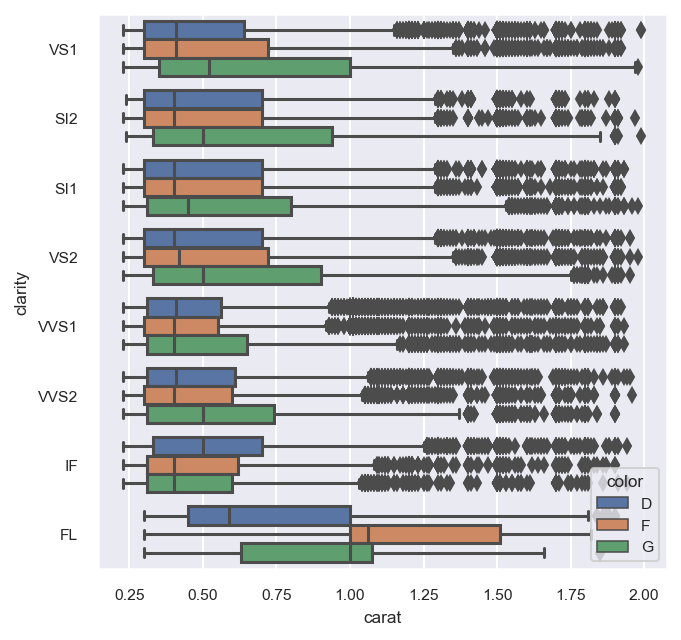

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
data = diamonds.query('carat < 2')
sns.boxplot(x='carat', y='clarity', data=data, ax=ax, hue='color', hue_order=['D', 'F', 'G'])

## Ordered Categorical Columns

* **Ordinal** - categorical columns that have a natural ordering
* Set on read with `dtype` and `pd.CategoricalDtype`

In [8]:
dtype = {
    'clarity':  pd.CategoricalDtype(['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL'], ordered=True),
    'color':    pd.CategoricalDtype(['I', 'H', 'G', 'F', 'E', 'D'], ordered=True),
    'cut':      pd.CategoricalDtype(['Good', 'Very Good', 'Ideal', 'Astor Ideal'], ordered=True),
    'polish':   pd.CategoricalDtype(['Good', 'Very Good', 'Excellent'], ordered=True),
    'symmetry': pd.CategoricalDtype(['Good', 'Very Good', 'Excellent'], ordered=True),
}

diamonds_ord = pd.read_csv('../data/diamonds.csv', dtype=dtype)
diamonds_ord.head(3)

carat  price     shape clarity color        cut  depth fluorescence  \
0   0.23    250  Princess     VS1     H       Good   74.0         None   
1   0.23    250  Princess     VS1     H       Good   77.8         None   
2   0.32    253  Princess     SI2     I  Very Good   74.7         None   

   lxwRatio     polish   symmetry  table  
0      1.01  Very Good       Good   81.0  
1      1.00  Very Good       Good   71.0  
2      1.04  Excellent  Very Good   72.0

Sorting in pandas uses their categorical ordering.

In [9]:
diamonds_ord['clarity'].value_counts().sort_index()

SI2     25552
SI1     36457
VS2     36736
VS1     35975
VVS2    31532
VVS1    29339
IF      11653
FL       1136
Name: clarity, dtype: int64

### Exercise 2

Create a bar plot of the average price for each clarity. Split clarity by color. Do not display a confidence interval.

<AxesSubplot:xlabel='clarity', ylabel='price'>

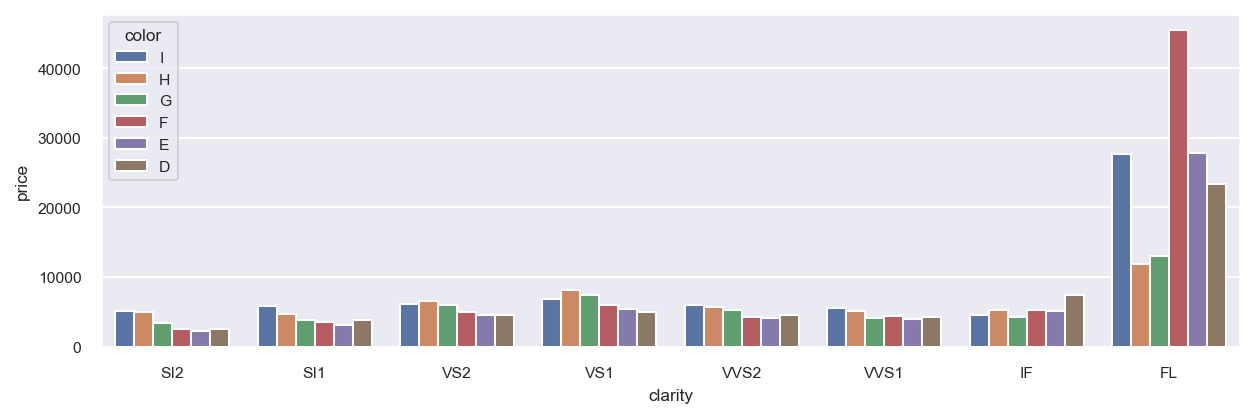

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(x='clarity', y='price', data=diamonds_ord, ax=ax, hue='color', ci=None)

### Move the legend with `sns.move_legend` function

* Pass the Axes or Grid as the first argument and set `loc` to one of upper/center/lower + right/left

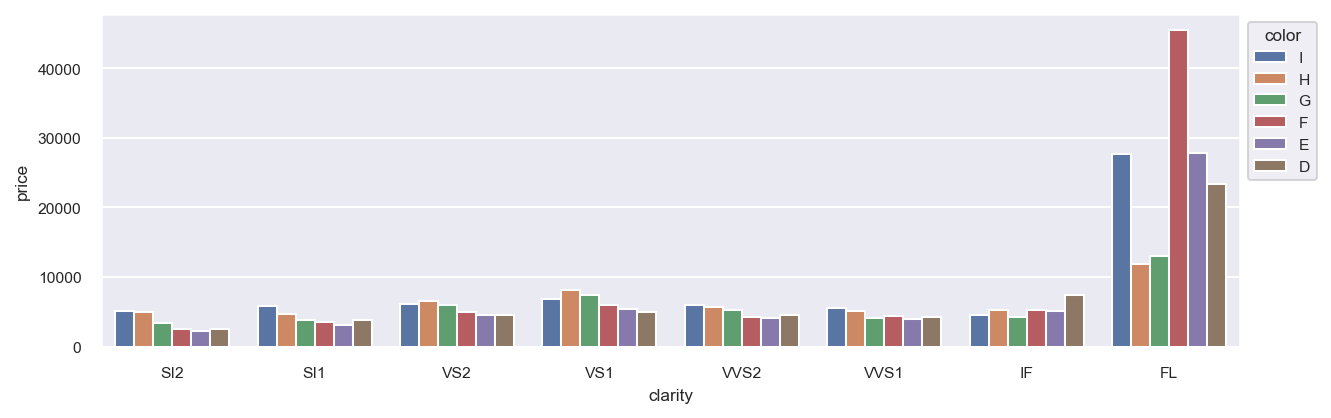

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(x='clarity', y='price', data=diamonds_ord, ax=ax, hue='color', ci=None)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

## Seaborn Grid Plots

* A Grid is a matplotlib Figure containing one or more Axes
    * rows and columns of plots
* Only a few Seaborn plotting functions create Grids
    * `relplot` - creates grids of scatter or line plots
    * `displot` - creates grids of histograms or KDEs
    * `catplot` - creates grids of boxplots, bars, points
    * `lmplot` - creates grids of linear regression plots
    * `clustermap` - unique function that creates hierarchical cluster map with dendograms
* With the exception of `clustermap`, grid plots do not create new types of plots. They simply create the same Axes plots within a grid

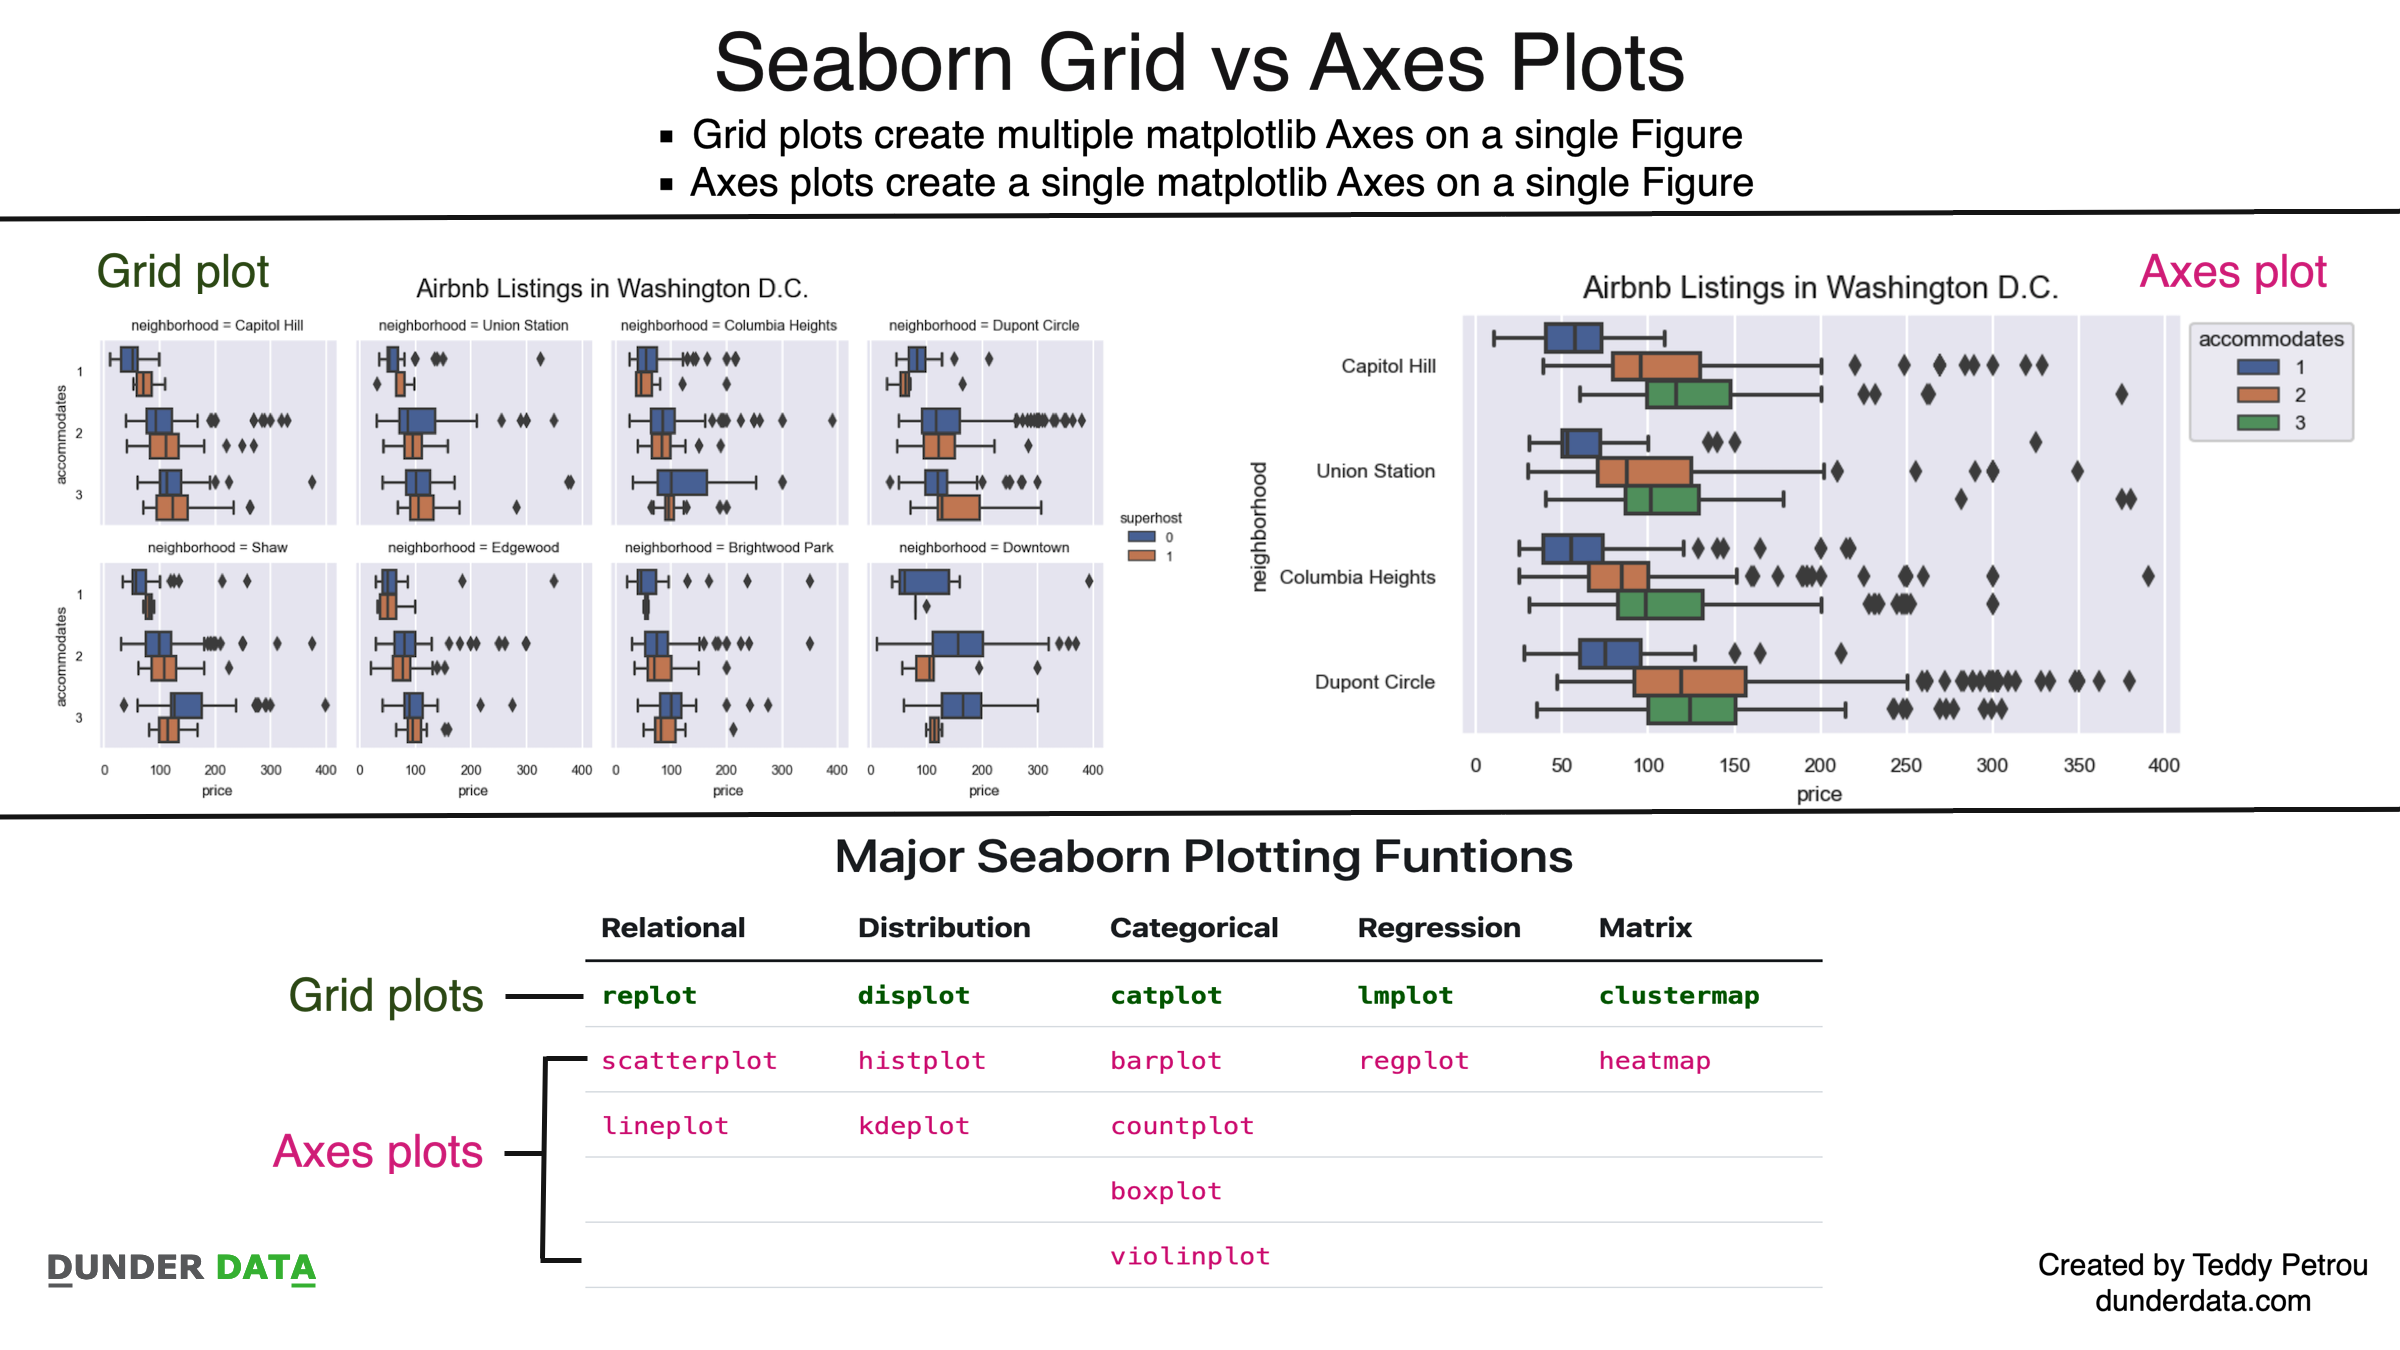

In [16]:
airbnb = pd.read_csv('../data/airbnb.csv')
airbnb.head()

id        neighborhood        room_type  accommodates  bedrooms  price  \
0  3686  Historic Anacostia     Private room             1       1.0     55   
1  3943            Edgewood     Private room             2       1.0     71   
2  4529    Eastland Gardens     Private room             4       1.0     54   
3  4967            Edgewood     Private room             1       1.0     99   
4  5589    Kalorama Heights  Entire home/apt             3       1.0     99   

   security_deposit  cleaning_fee  rating  superhost       response_time  \
0                25            25    4.60          0  a few days or more   
1                50             0    4.81          0                 NaN   
2                25            50    4.66          0  within a few hours   
3                50             0    4.74          1      within an hour   
4                50             0    4.54          0  within a few hours   

  acceptance_rate  host_since last_review  num_reviews  latitude  longitude  \
0             67%  2008-11-26  2021-08-09           76  38.86339  -76.98889   
1             NaN  2008-12-12  2021-09-11          434  38.91195  -77.00456   
2             NaN  2008-12-30  2019-07-05          102  38.90585  -76.94469   
3             85%  2009-01-26  2016-09-22           31  38.91409  -76.99368   
4             11%  2009-01-13  2020-03-05           95  38.91887  -77.04008   

   minimum_nights  maximum_nights  
0               2             365  
1               2            1125  
2              30             180  
3               2             365  
4               5              24

## How to use Grid plots 

* Use one of `relplot`, `displot`, `catplot`, or `lmplot`
* Set `kind` to the underlying Axes plot ("scatter", "line", "hist", "kde", "bar", "count", "box", "violin")
* Set `row` or `col` (or both) to a categorical column
* Set `col_wrap` to an integer to wrap the plots when only using `col` and not `row`
* Filter and set specific order with `row_order`, `col_order`
* No need to use a grid plot when creating a single Axes
* Use `height` and `aspect` to control height and width of each individual Axes
    * `height` is in figure inches of a single Axes
    * `aspect` is multiplied by `height` to get width of a single Axes
* Additional keyword arguments are forwarded to the underlying Axes plotting function

### Exercise 3

Create a 4x2 grid of plots broken out by the top 8 most frequent neighborhoods. In each Axes, create a boxplot of prices split by the number the listing accommodates and further split by superhost status.

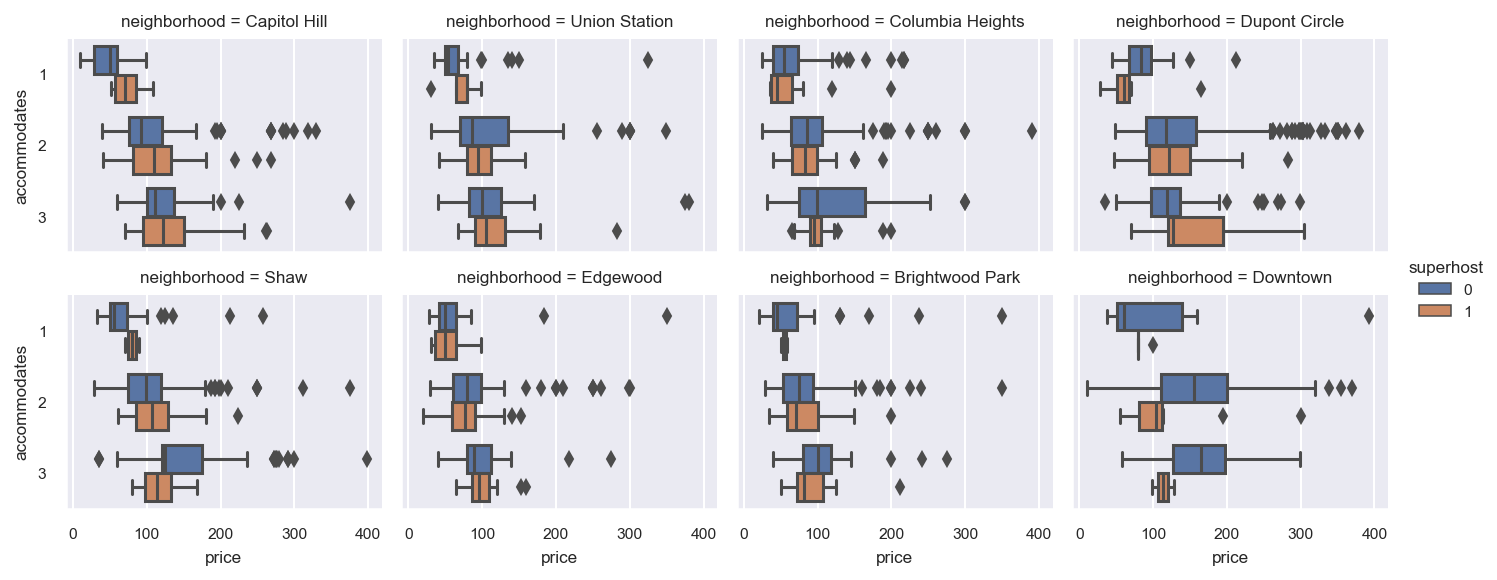

In [24]:
top8 = airbnb['neighborhood'].value_counts().index[:8]
data = airbnb.query('price < 400')
grid = sns.catplot(x='price', y='accommodates', data=data, kind='box', orient='h',
                    order=[1, 2, 3],
                    col='neighborhood', col_order=top8, col_wrap=4,
                    hue='superhost',
                    height=2, aspect=1.2)

In [25]:
type(grid)

seaborn.axisgrid.FacetGrid

## FacetGrid returned

* A wrapper around a matplotlib figure
* Underlying `figure` attribute


### Exercise 4

Get figure size with `get_size_inches` method

In [27]:
grid.figure.get_size_inches()

array([10.19660998,  4.        ])

### Set figure title

* `grid.figure.suptitle`

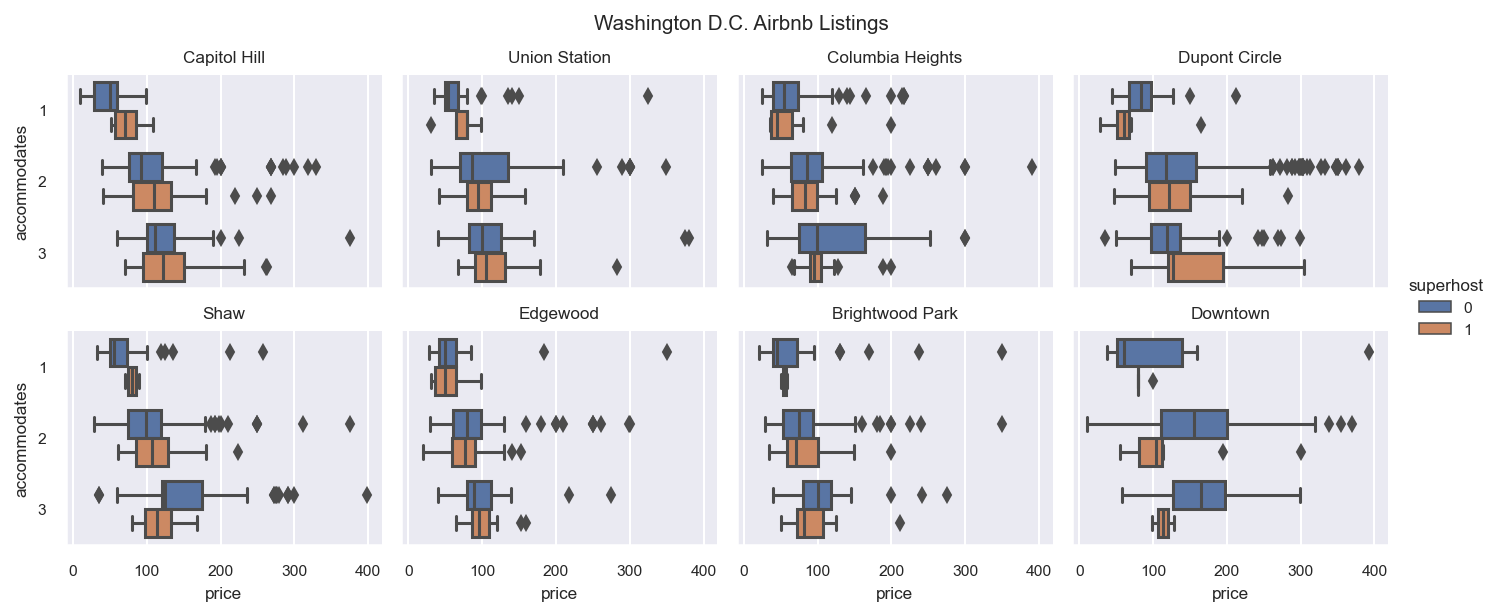

In [34]:
top8 = airbnb['neighborhood'].value_counts().index[:8]
data = airbnb.query('price < 400')
grid = sns.catplot(x='price', y='accommodates', data=data, kind='box', orient='h',
                    order=[1, 2, 3],
                    col='neighborhood', col_order=top8, col_wrap=4,
                    hue='superhost',
                    height=2, aspect=1.2)
grid.figure.suptitle('Washington D.C. Airbnb Listings', y=1.03)
grid.set_titles('{col_name}');

### Change Axes titles with `grid.set_titles

In [ ]:
grid.set_titles('{col_var}')

### Exercise 5

Create a 2x2 grid of scatterplots of listing location (longitude, latitude) broken out by number accommodates. Limit the number it accommodates to 1 to 4. Color by neighborhoods, size by price, and style by superhost. Use `grid.set` to set equal aspect to all Axes. Filter for price less 400 and top 8 neighborhoods first.

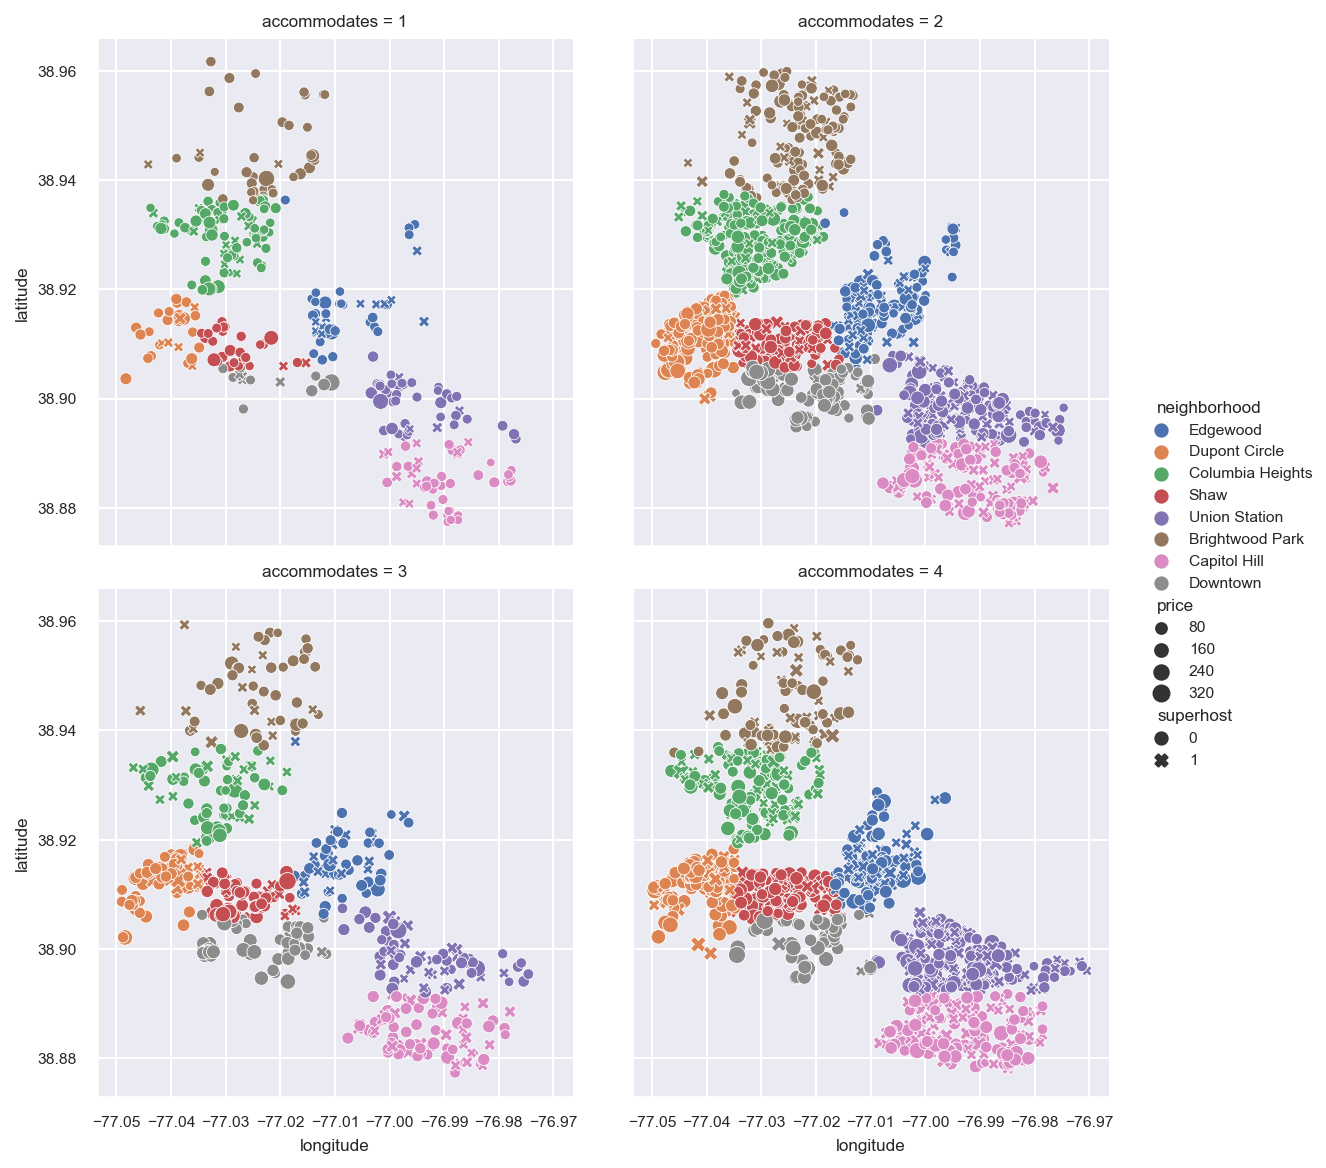

In [44]:
data = airbnb.query('price < 400 and neighborhood in @top8')
grid = sns.relplot(x='longitude', y='latitude', data=data, kind='scatter',
                   col='accommodates', col_order=[1, 2, 3, 4], col_wrap=2,
                   height=4,
                   hue='neighborhood', size='price', style='superhost')
grid.set(aspect='equal')

### Exercise 6

Create a 4x2 grid of bar plots where the columns are the top 4 neighborhoods and the rows the top 2 room types. Graph the median price by accommodates (limiting to 1-4) and splitting by superhost. Use a 90% confidence interval. Change the axes titles to "room type in neighborhood". Change the title of the figure. Filter for price less than 400 first. 

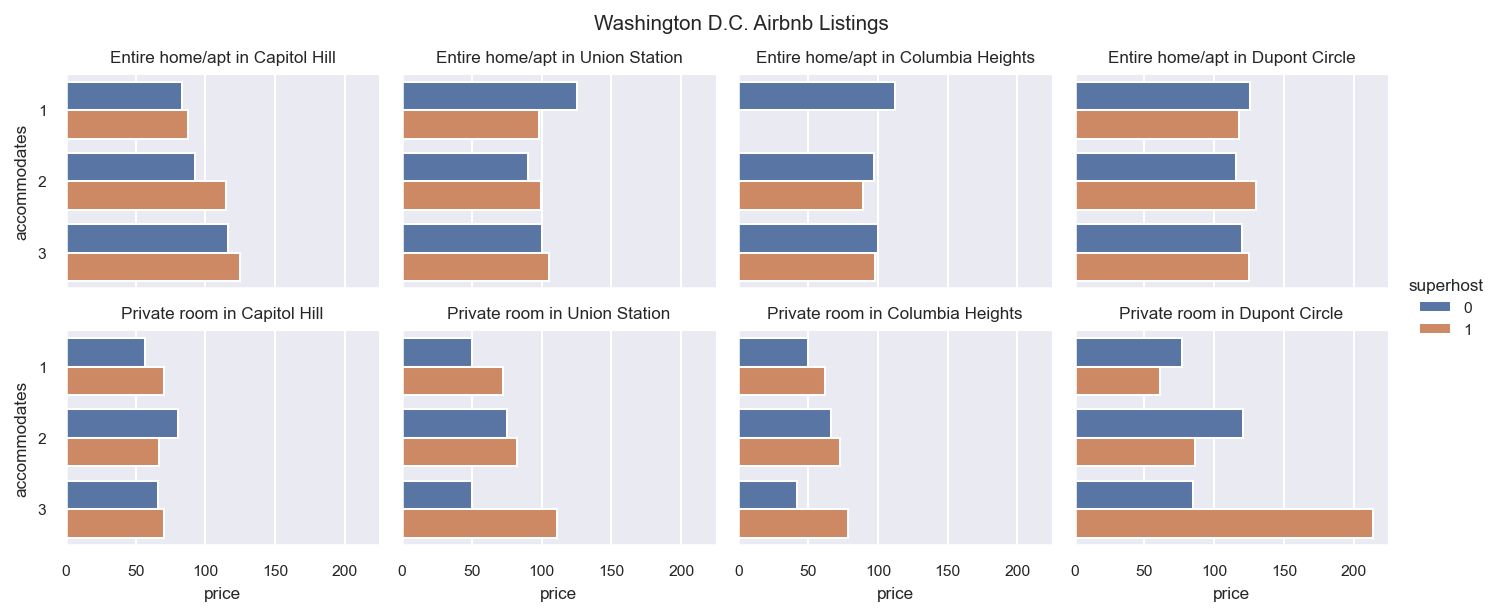

In [52]:
top4 = airbnb['neighborhood'].value_counts().index[:4]
top2_rt = airbnb['room_type'].value_counts().index[:2]
data = airbnb.query('price < 400')
grid = sns.catplot(x='price', y='accommodates', data=data, kind='bar', orient='h',
                    order=[1, 2, 3],
                    col='neighborhood', col_order=top4,
                    row='room_type', row_order=top2_rt,
                    hue='superhost',
                    height=2, aspect=1.2, ci=None, estimator=np.median)
grid.figure.suptitle('Washington D.C. Airbnb Listings', y=1.03)
grid.set_titles('{row_name} in {col_name}');

### Exercise 7

Create a grid of bar plots showing the mean price for every unique clarity. Use color as the categorical variable.

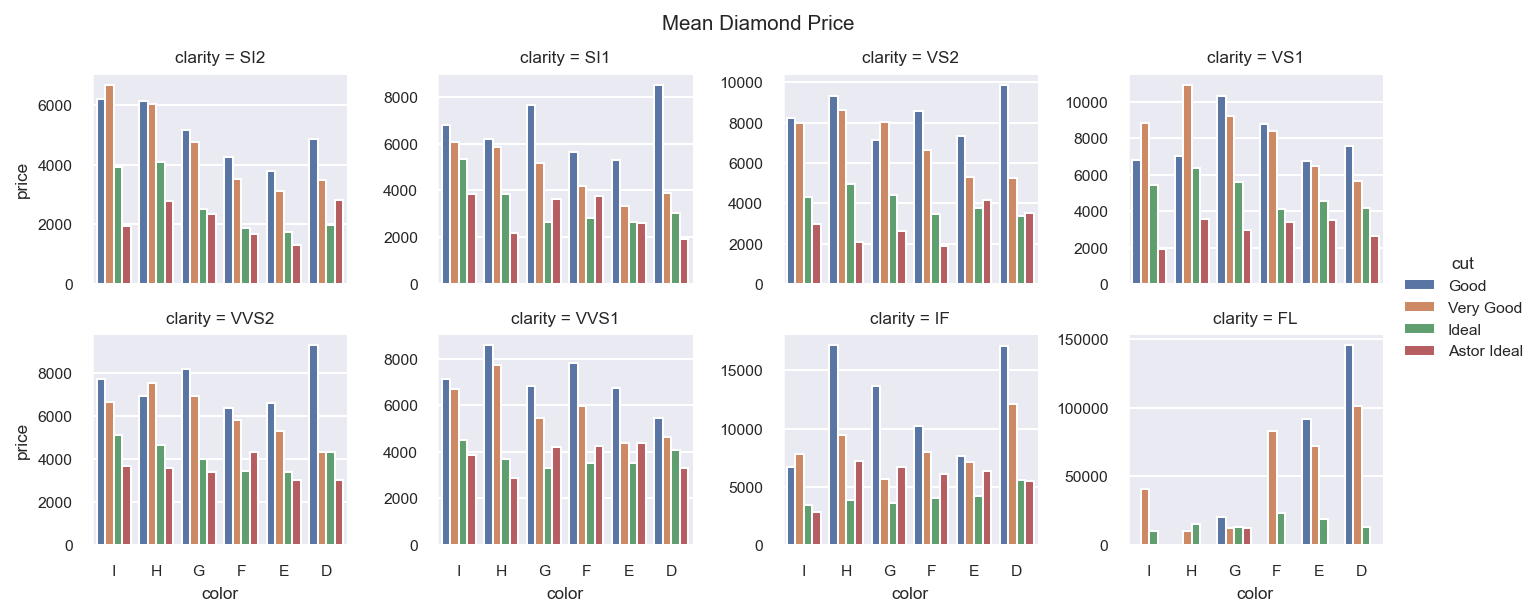

In [59]:
grid = sns.catplot(x='color', y='price', data=diamonds_ord, kind='bar',
                   col='clarity', col_wrap=4,
                   hue='cut',
                   height=2, aspect=1.2, ci=None, estimator=np.mean,
                    sharey=False
                  )
grid.figure.suptitle('Mean Diamond Price', y=1.03);

## Regression plots 

* `regplot` - axes level
* `lmplot` - grid plot - uses `regplot` underneath
* Similar to `scatterplot` but with less options and draws regression line through points


### Exercise 8

Draw regression line through carat/price relationship.

In [61]:
dia = diamonds_ord.sample(frac=0.1, random_state=123)
dia.head(3)

carat  price  shape clarity color        cut  depth fluorescence  \
147188   1.20  10685  Round     VS2     D      Ideal   61.9         None   
70103    0.40    883  Round     VS2     H      Ideal   62.1         None   
204269   2.01  22254   Oval     VS1     G  Very Good   63.2  Medium Blue   

        lxwRatio     polish   symmetry  table  
147188      1.00  Excellent  Excellent   58.0  
70103       1.01  Excellent  Excellent   56.0  
204269      1.45  Excellent  Excellent   61.0

<AxesSubplot:xlabel='carat', ylabel='price'>

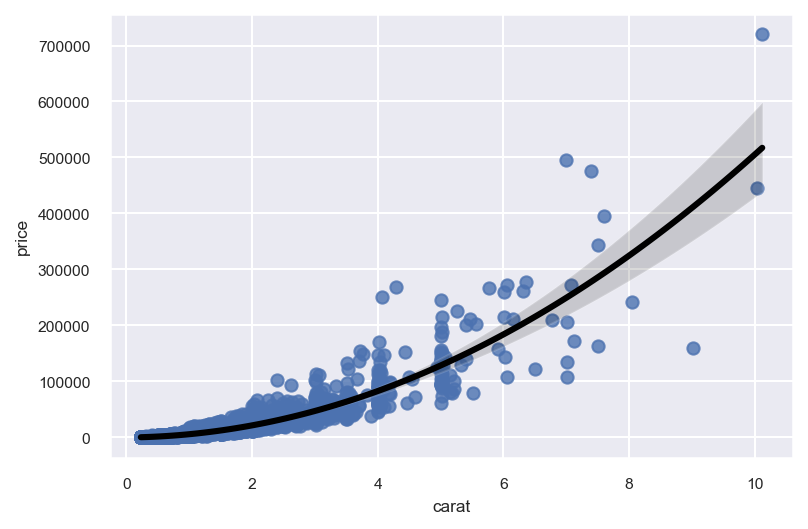

In [68]:
sns.regplot(x='carat', y='price', data=dia, order=2, 
            line_kws={'color': 'black', 'lw': 3})

/Users/Ted/miniconda3/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/Ted/miniconda3/lib/python3.8/site-packages/seaborn/regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


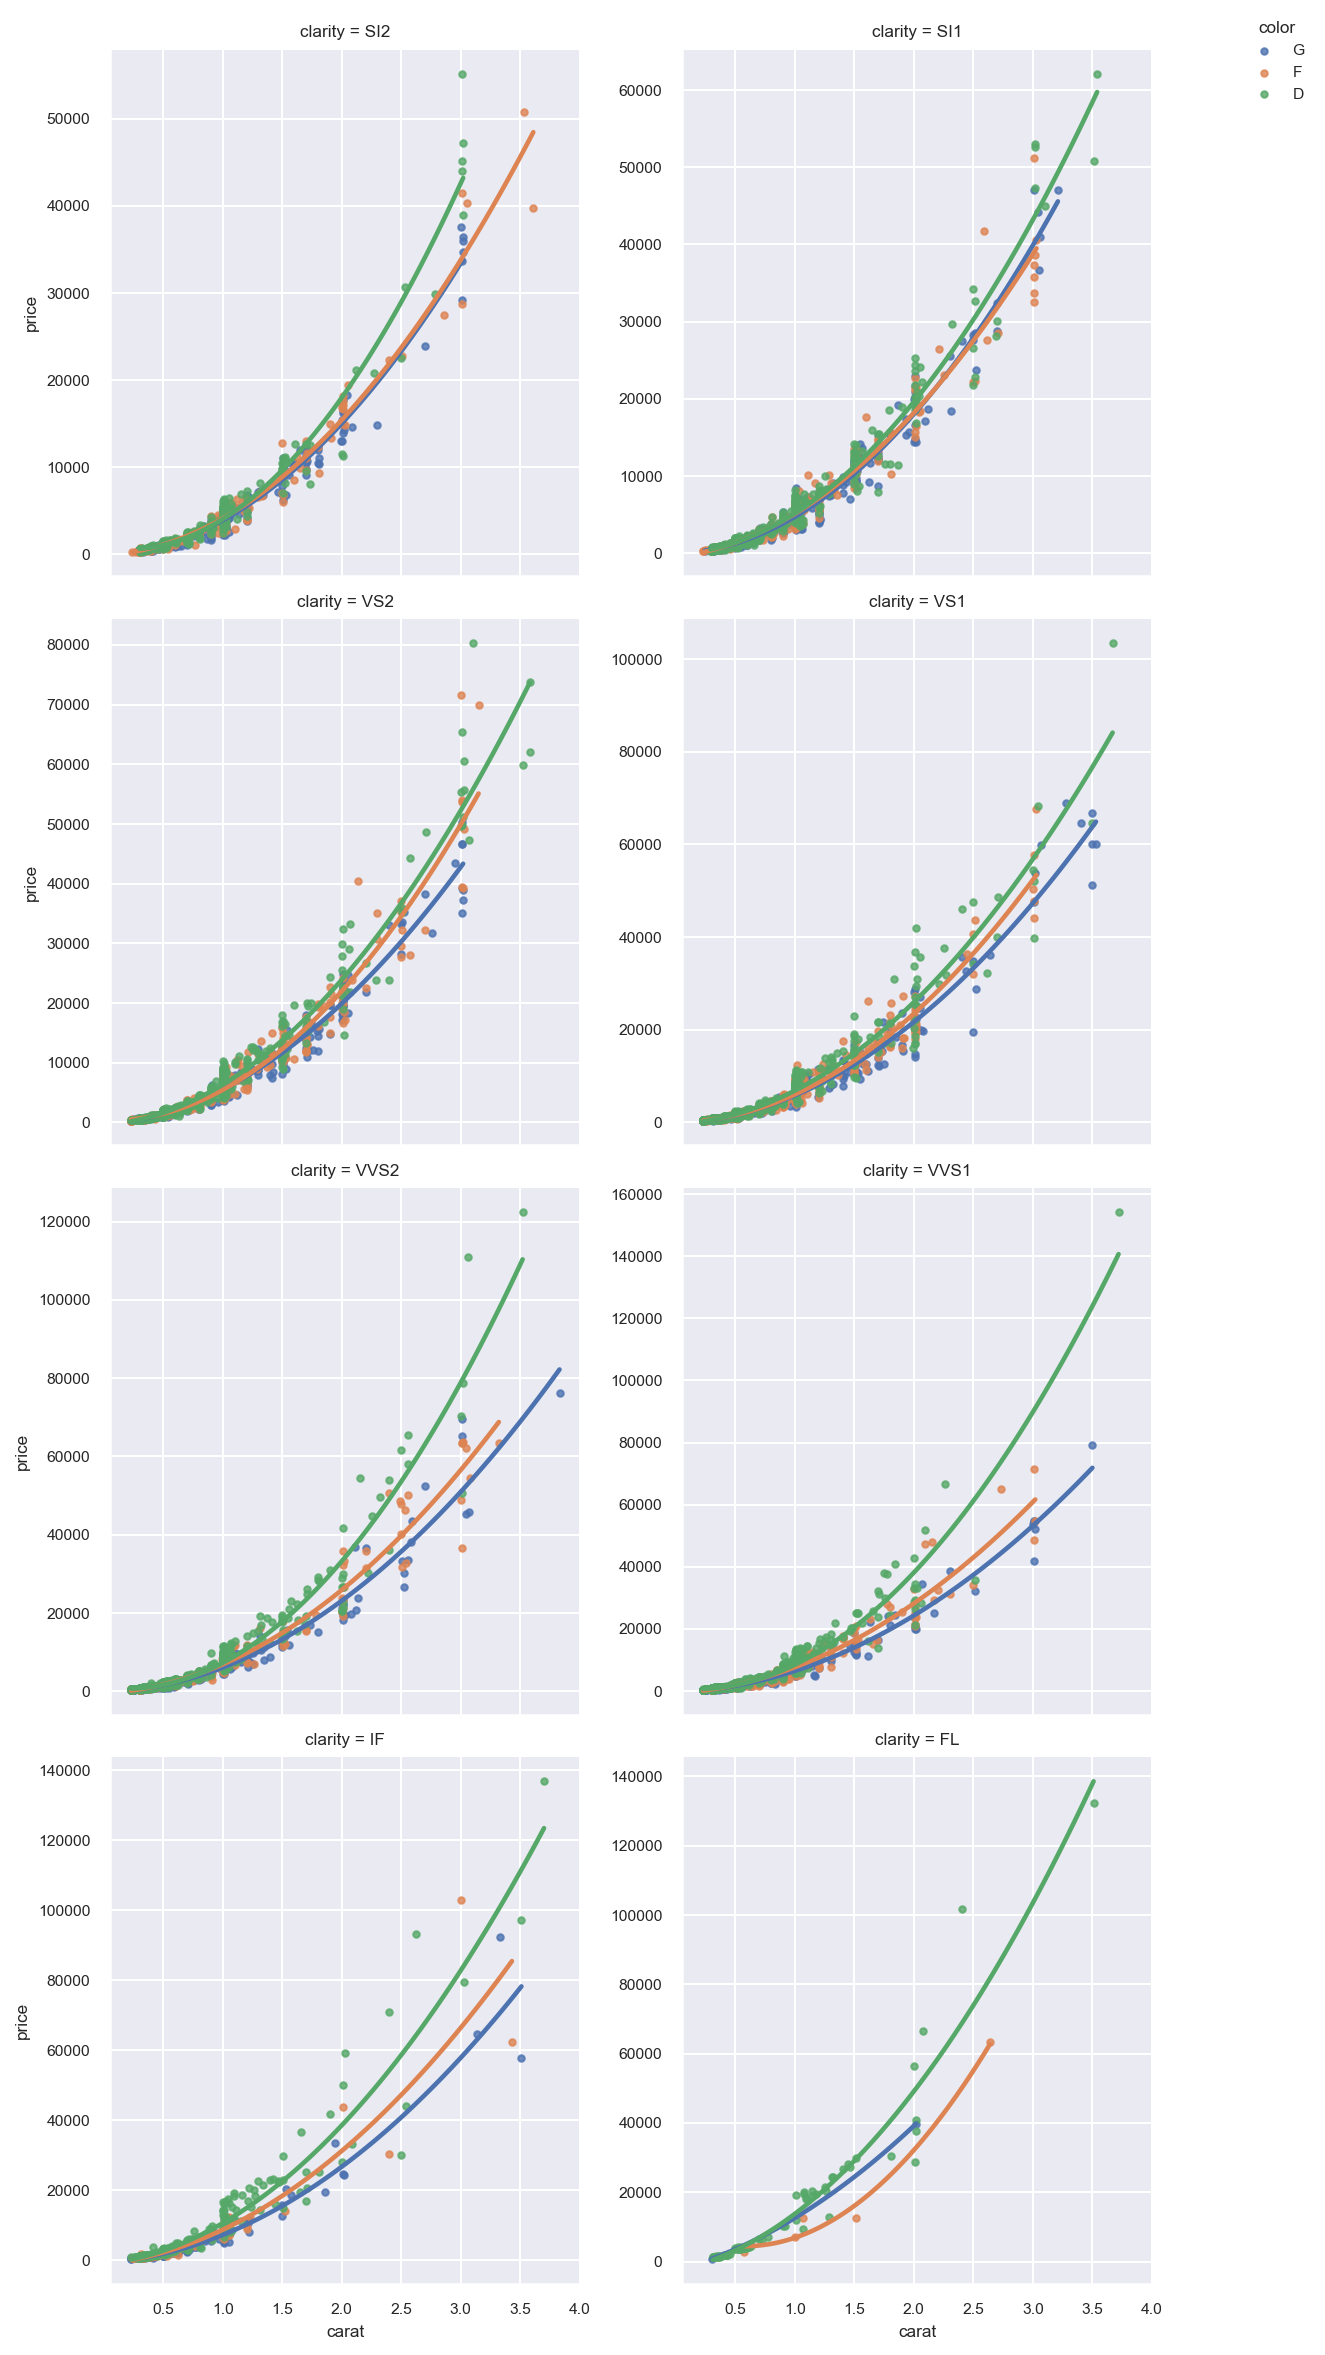

In [85]:
grid = sns.lmplot(x='carat', y='price', data=dia.query('carat < 4'), order=2, 
                   col='clarity', col_wrap=2, ci=None,
                  height=4,
#                   hue='cut', hue_order=['Good', 'Very Good', 'Ideal'],
                  hue='color', hue_order=['G', 'F', 'D'],
                  scatter_kws={'s': 10},
                 sharey=False)
sns.move_legend(grid, bbox_to_anchor=(1, 1), loc='upper left')

## Mini-project 1

Create a data visualization that clearly shows that higher levels of clarity and color do correspond to higher prices, despite what exercise 7 showed.

## Start again at 10 after

## Mini-project 2

Create a scatterplot of the "mass" of the exoplanet vs the "semi-major axis", both in log units, and color the points based on the "planet discovery method".

In [86]:
exo = pd.read_csv('../data/exoplanets.csv')
exo.head()

NAME     MSINI      MASS         A        PER PLANETDISCMETH
0   Kepler-107 d       NaN  0.003712  0.078010   7.958203        Transit
1  Kepler-1049 b       NaN  0.002453  0.034472   3.273461        Transit
2   Kepler-813 b       NaN  0.015970  0.137610  19.129473        Transit
3   Kepler-427 b  0.310432  0.290000  0.091351  10.290994        Transit
4  Kepler-1056 b       NaN  0.027126  0.185149  27.495606        Transit

Text(0.003712, 0.07801, 'Kepler-107 d')

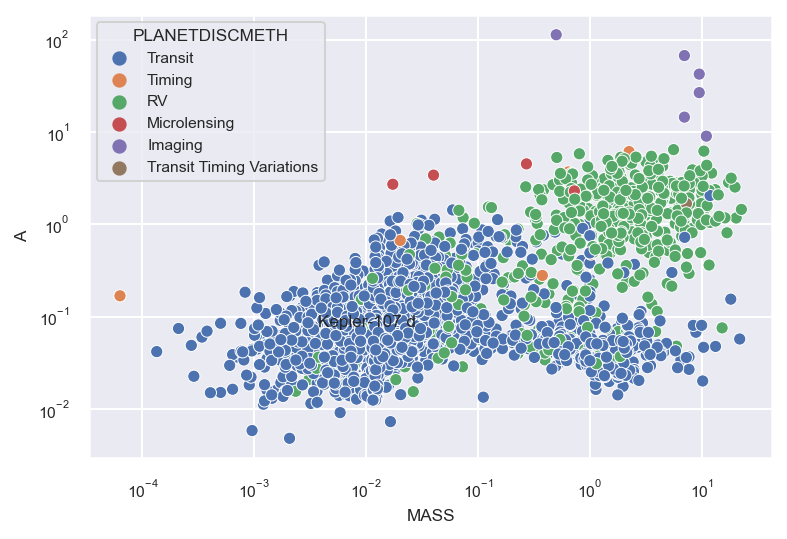

In [98]:
ax = sns.scatterplot(x='MASS', y='A', data=exo, hue='PLANETDISCMETH')
ax.set_xscale('log')
ax.set_yscale('log')
ax.annotate('Kepler-107 d', xy=(0.003712, 0.078010))

## Finding similar groups with `clustermap`

In [99]:
meetup = pd.read_csv('../data/meetup.csv', index_col='member_id')
meetup.iloc[:3, :5]

Houston Arts + Culture  PyHou - Houston Python Enthusiasts!  \
member_id                                                                
16691721                        0                                    1   
230046555                       0                                    0   
186076150                       0                                    0   

           TIBCO Houston User Group  \
member_id                             
16691721                          0   
230046555                         0   
186076150                         0   

           Houston Beer Lovers- Let's discover beer around Houston  \
member_id                                                            
16691721                                                   0         
230046555                                                  0         
186076150                                                  0         

           Houston Energy Data Science Meetup  
member_id                                      
16691721                                    1  
230046555                                   1  
186076150                                   1

In [102]:
meetup.sum().nlargest()

PyHou - Houston Python Enthusiasts!         554
Houston Energy Data Science Meetup          476
Houston Machine Learning                    441
Sketch City                                 410
DigitalCrafts | Learn to Code in Houston    375
dtype: int64

In [107]:
meetup.corr().round(2).stack()[lambda x: x < 1].nlargest(10)

Houston 20s & 30s Fun Stuff         Discovering Houston                   0.40
Discovering Houston                 Houston 20s & 30s Fun Stuff           0.40
Houston Arts + Culture              Houston Art & Museum Events           0.38
Houston Art & Museum Events         Houston Arts + Culture                0.38
Houston Energy Data Science Meetup  Houston Machine Learning              0.37
Houston Machine Learning            Houston Energy Data Science Meetup    0.37
Houston Energy Data Science Meetup  Houston R Users Group                 0.34
Houston R Users Group               Houston Energy Data Science Meetup    0.34
Houston Energy Data Science Meetup  Big Data Houston                      0.32
Big Data Houston                    Houston Energy Data Science Meetup    0.32
dtype: float64

In [110]:
corr = meetup.corr().round(2)
corr.head()

Houston Arts + Culture  \
Houston Arts + Culture                                                1.00   
PyHou - Houston Python Enthusiasts!                                  -0.09   
TIBCO Houston User Group                                              0.00   
Houston Beer Lovers- Let's discover beer around...                    0.24   
Houston Energy Data Science Meetup                                   -0.18   

                                                    PyHou - Houston Python Enthusiasts!  \
Houston Arts + Culture                                                            -0.09   
PyHou - Houston Python Enthusiasts!                                                1.00   
TIBCO Houston User Group                                                          -0.05   
Houston Beer Lovers- Let's discover beer around...                                -0.09   
Houston Energy Data Science Meetup                                                 0.13   

                                                    TIBCO Houston User Group  \
Houston Arts + Culture                                                  0.00   
PyHou - Houston Python Enthusiasts!                                    -0.05   
TIBCO Houston User Group                                                1.00   
Houston Beer Lovers- Let's discover beer around...                      0.01   
Houston Energy Data Science Meetup                                      0.03   

                                                    Houston Beer Lovers- Let's discover beer around Houston  \
Houston Arts + Culture                                                                           0.24         
PyHou - Houston Python Enthusiasts!                                                             -0.09         
TIBCO Houston User Group                                                                         0.01         
Houston Beer Lovers- Let's discover beer around...                                               1.00         
Houston Energy Data Science Meetup                                                              -0.12         

                                                    Houston Energy Data Science Meetup  \
Houston Arts + Culture                                                           -0.18   
PyHou - Houston Python Enthusiasts!                                               0.13   
TIBCO Houston User Group                                                          0.03   
Houston Beer Lovers- Let's discover beer around...                               -0.12   
Houston Energy Data Science Meetup                                                1.00   

                                                    Houston 20s & 30s Fun Stuff  \
Houston Arts + Culture                                                     0.18   
PyHou - Houston Python Enthusiasts!                                       -0.11   
TIBCO Houston User Group                                                  -0.05   
Houston Beer Lovers- Let's discover beer around...                         0.21   
Houston Energy Data Science Meetup                                        -0.13   

                                                    Data Science Applications Community (DSAC) - Houston  \
Houston Arts + Culture                                                                          -0.05      
PyHou - Houston Python Enthusiasts!                                                              0.02      
TIBCO Houston User Group                                                                         0.15      
Houston Beer Lovers- Let's discover beer around...                                              -0.01      
Houston Energy Data Science Meetup                                                               0.01      

                                                    Houston Legal Hackers  \
Houston Arts + Culture                                               0.02   
PyHou - Houston Python Enthusiasts!          

### Using `clustermap`

* vmin, vmax, cmap

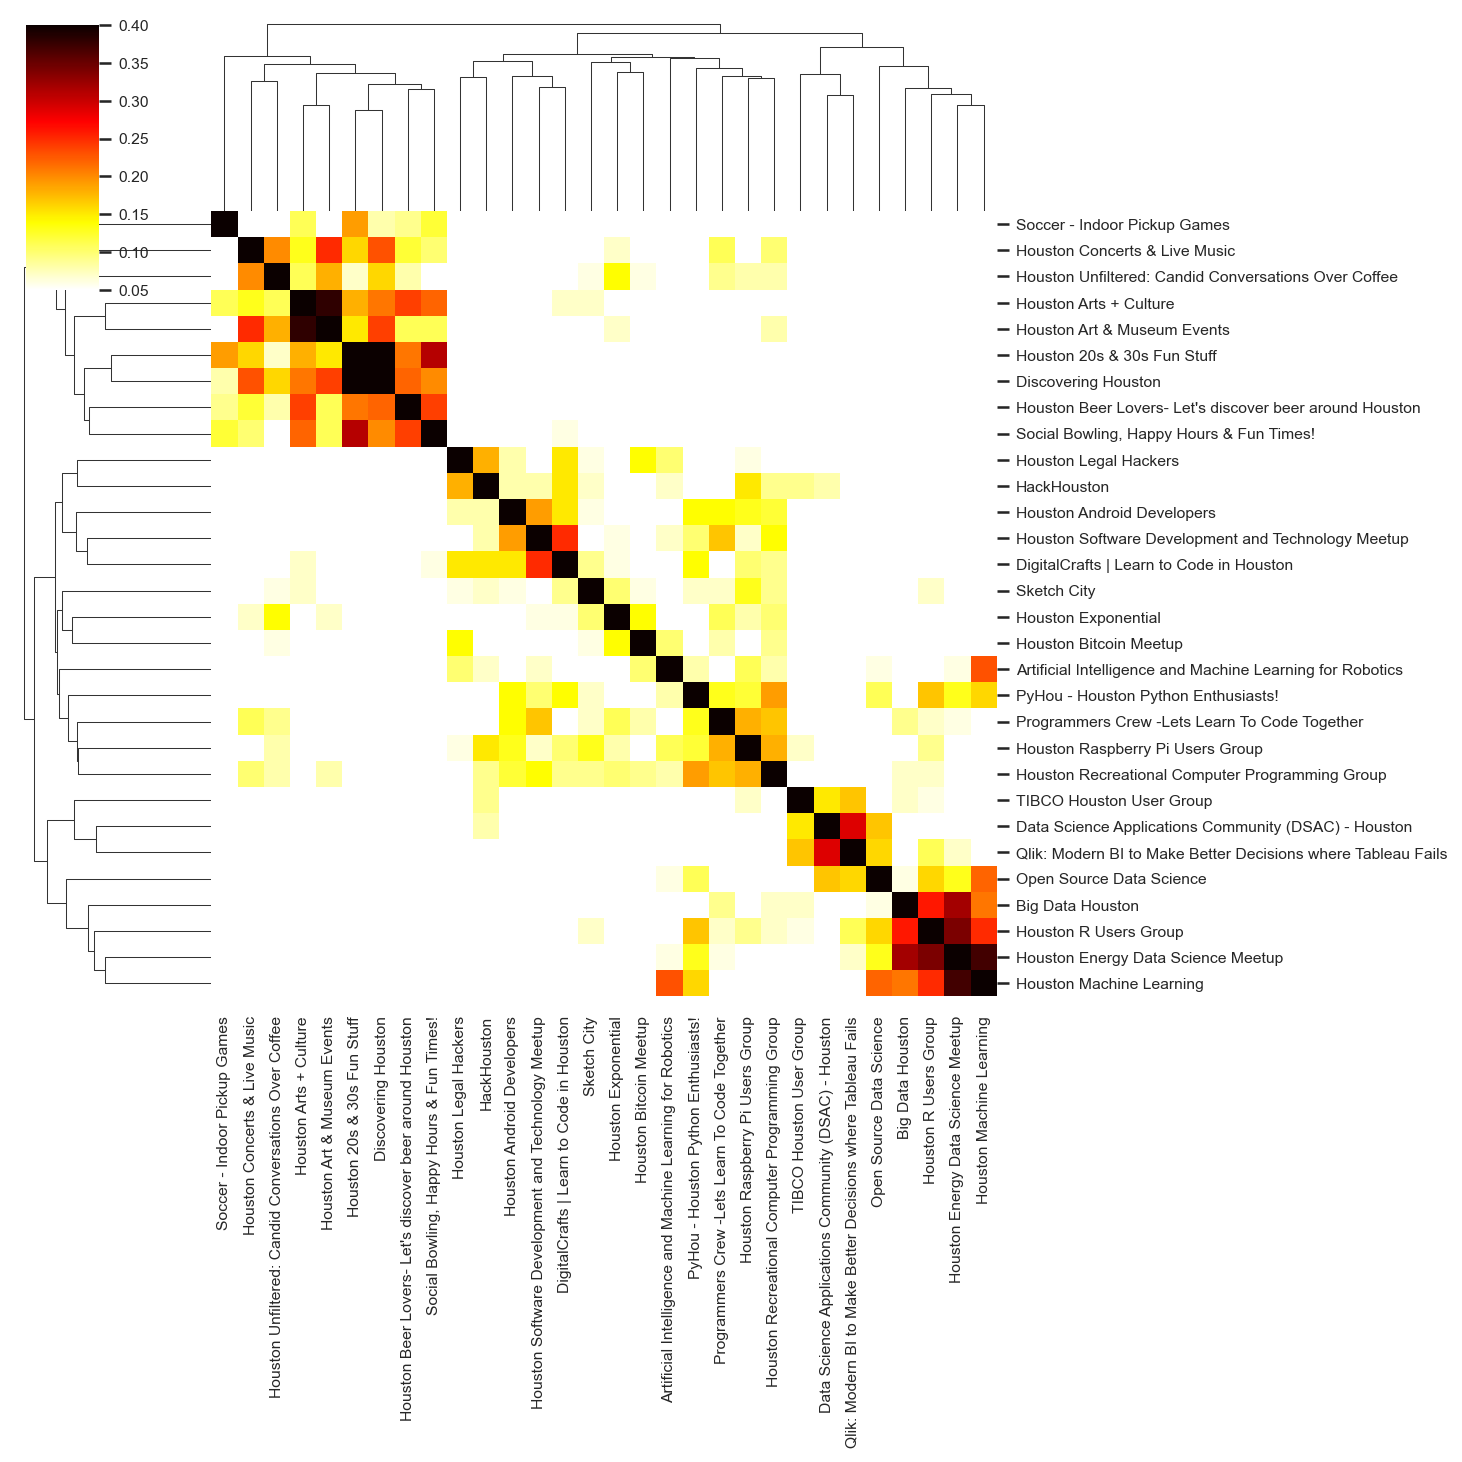

In [113]:
sns.clustermap(corr, vmin=0.05, vmax=0.4, cmap='hot_r')

## Major project

The company you work for is looking to gain insights from its purchase order data during the year 2014. You have 10,000 different purchase orders from different states. The state, date, and revenue are recorded from each purchase order.

The company is primarily interested in determining what is happening to revenue over time and what strategy should be undertaken to maximize revenue.

In [114]:
orders = pd.read_csv('../data/orders.csv', parse_dates=['order_date'])
orders.head()

state order_date  revenue
0  Arkansas 2014-12-24   1311.0
1   Florida 2014-10-15    698.0
2      Iowa 2014-09-07   1193.0
3   Indiana 2014-05-19    469.0
4     Maine 2014-04-19    334.0

### Add month as a column

In [115]:
orders['month'] = orders['order_date'].dt.month_name()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
orders['month'] = orders['month'].astype(pd.CategoricalDtype(months, ordered=True))
orders.head()

state order_date  revenue      month
0  Arkansas 2014-12-24   1311.0   December
1   Florida 2014-10-15    698.0    October
2      Iowa 2014-09-07   1193.0  September
3   Indiana 2014-05-19    469.0        May
4     Maine 2014-04-19    334.0      April

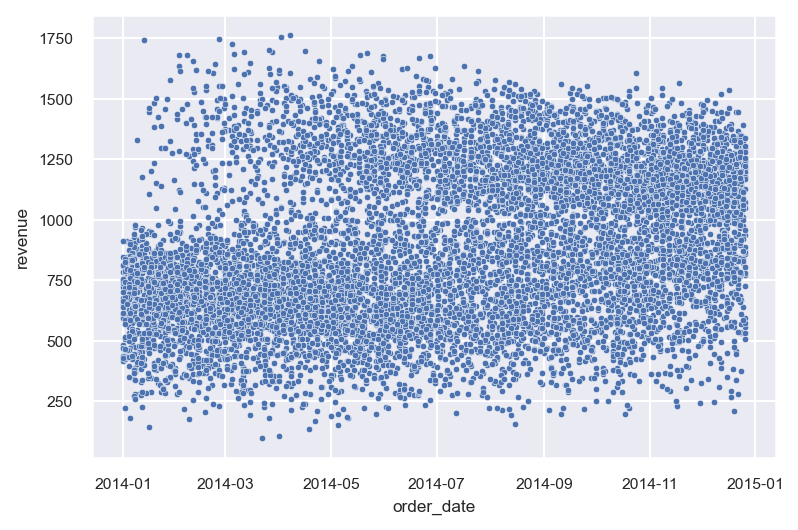

In [119]:
sns.scatterplot(x='order_date', y='revenue', data=orders, s=10);

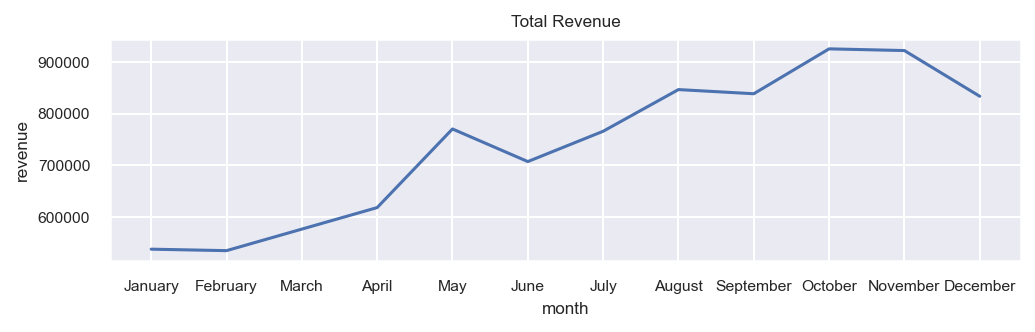

In [124]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.sum, ci=None, ax=ax)
ax.set_title('Total Revenue');

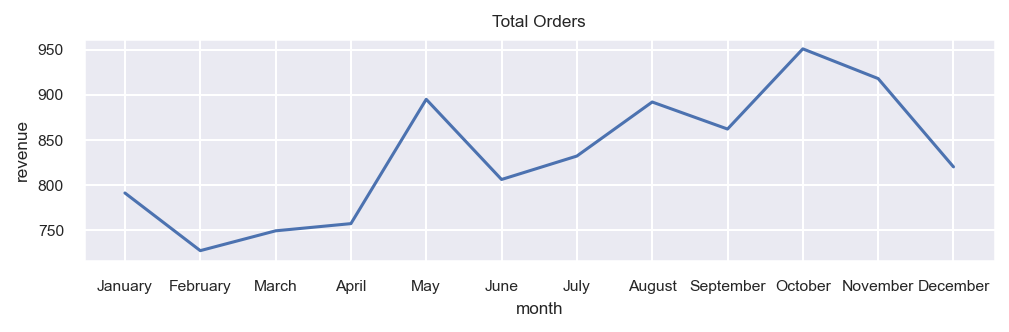

In [129]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.size, ci=None, ax=ax)
ax.set_title('Total Orders');

### Find the mean revenue per order

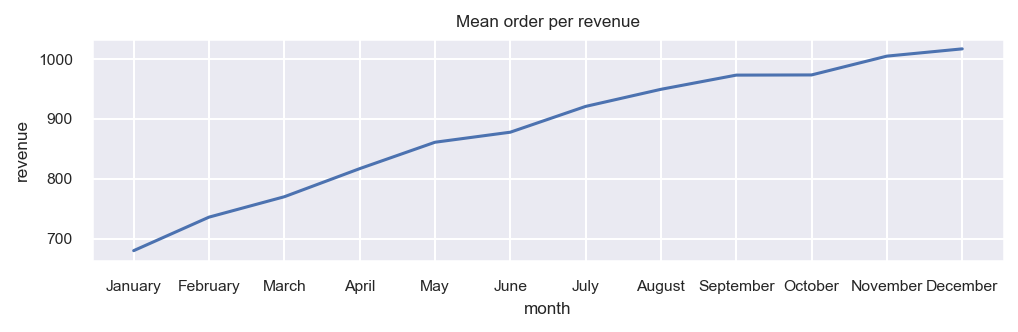

In [130]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.mean, ci=None, ax=ax)
ax.set_title('Mean order per revenue');

## Do same graphs but split by state

In [131]:
orders.head()

state order_date  revenue      month
0  Arkansas 2014-12-24   1311.0   December
1   Florida 2014-10-15    698.0    October
2      Iowa 2014-09-07   1193.0  September
3   Indiana 2014-05-19    469.0        May
4     Maine 2014-04-19    334.0      April

## Restart at 50 after

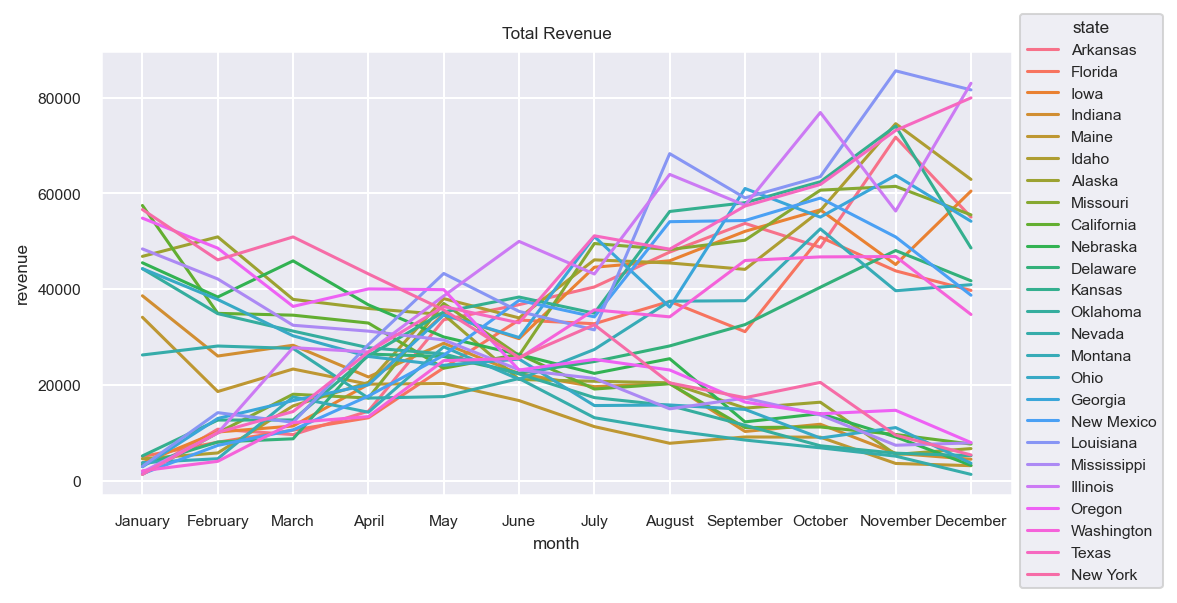

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.sum, ci=None, ax=ax,
            hue='state')
ax.set_title('Total Revenue')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

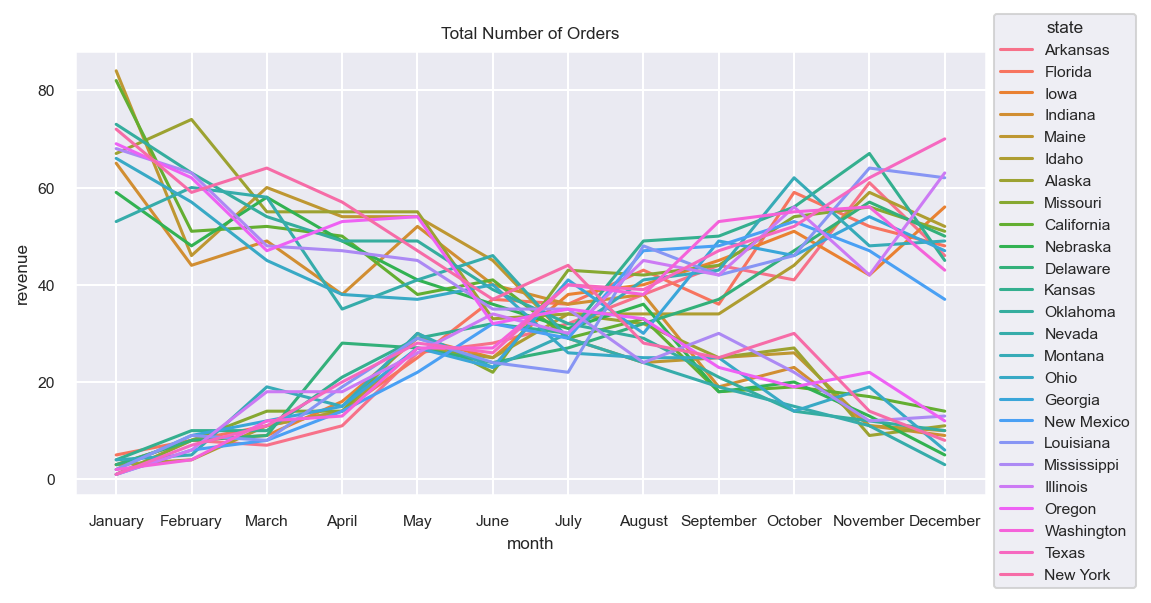

In [136]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.size, ci=None, ax=ax,
            hue='state')
ax.set_title('Total Number of Orders')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

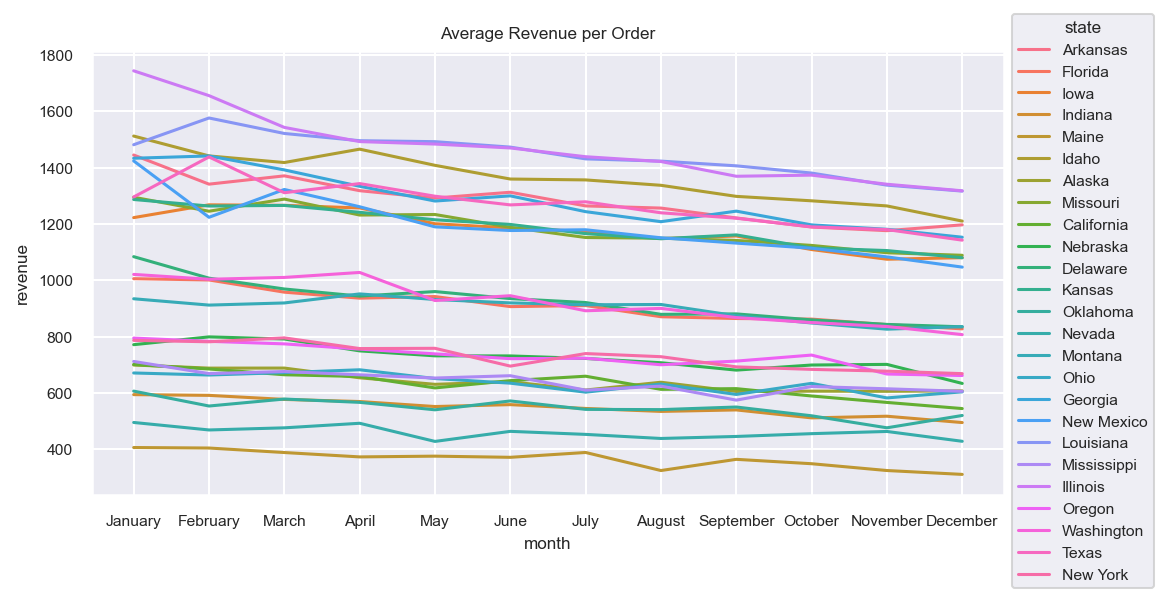

In [138]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.mean, ci=None, ax=ax,
            hue='state')
ax.set_title('Average Revenue per Order')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

In [143]:
s = orders.query('month == "December"')['state'].value_counts()
s

Texas          70
Illinois       63
Louisiana      62
Iowa           56
Idaho          52
Missouri       51
Delaware       50
Montana        49
Florida        48
Georgia        47
Arkansas       46
Kansas         45
Washington     43
New Mexico     37
California     14
Mississippi    13
Oregon         12
Alaska         11
Oklahoma       10
Maine          10
Indiana         9
New York        8
Ohio            6
Nebraska        5
Nevada          3
Name: state, dtype: int64

In [145]:
dec_order = s[s < 20].index
inc_order = s[s >= 20].index

In [146]:
dec_order

Index(['California', 'Mississippi', 'Oregon', 'Alaska', 'Oklahoma', 'Maine',
       'Indiana', 'New York', 'Ohio', 'Nebraska', 'Nevada'],
      dtype='object')

In [147]:
inc_order

Index(['Texas', 'Illinois', 'Louisiana', 'Iowa', 'Idaho', 'Missouri',
       'Delaware', 'Montana', 'Florida', 'Georgia', 'Arkansas', 'Kansas',
       'Washington', 'New Mexico'],
      dtype='object')

In [155]:
orders['number_of_orders'] = orders['state'].isin(inc_order).map({True: 'Increasing', False: 'Decreasing'})
orders

state order_date  revenue      month        kind number_of_orders
0     Arkansas 2014-12-24   1311.0   December  Increasing       Increasing
1      Florida 2014-10-15    698.0    October  Increasing       Increasing
2         Iowa 2014-09-07   1193.0  September  Increasing       Increasing
3      Indiana 2014-05-19    469.0        May  Decreasing       Decreasing
4        Maine 2014-04-19    334.0      April  Decreasing       Decreasing
...        ...        ...      ...        ...         ...              ...
9995     Idaho 2014-05-02   1348.0        May  Increasing       Increasing
9996   Georgia 2014-07-16   1200.0       July  Increasing       Increasing
9997  Arkansas 2014-05-12   1231.0        May  Increasing       Increasing
9998   Montana 2014-07-11    871.0       July  Increasing       Increasing
9999  Oklahoma 2014-04-17    641.0      April  Decreasing       Decreasing

[10000 rows x 6 columns]

## Duplicate graphs with `kind`

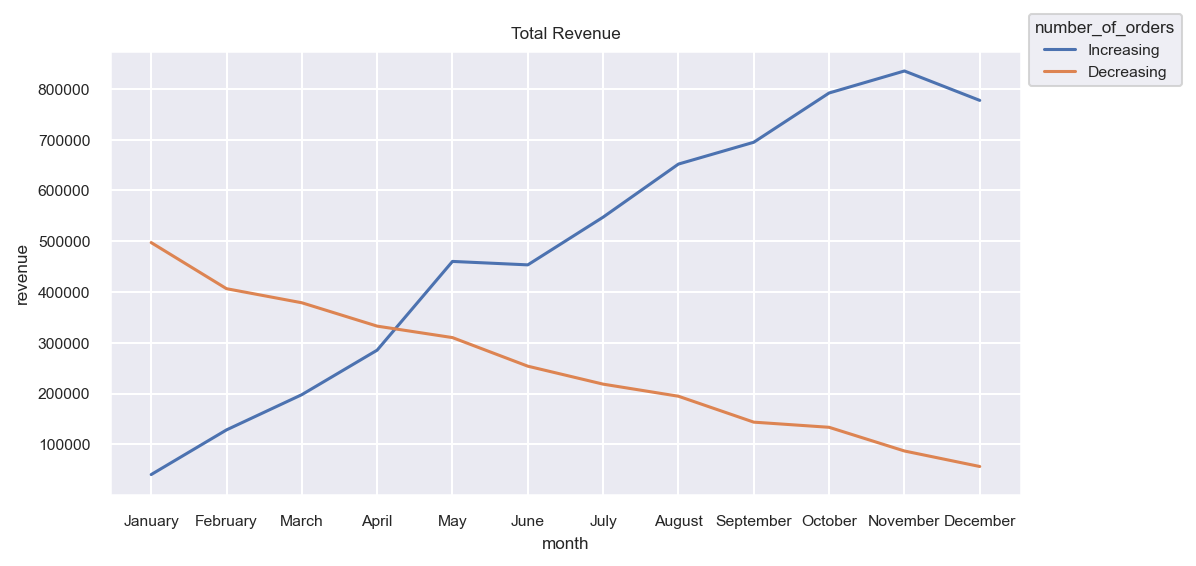

In [156]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.sum, ci=None, ax=ax,
            hue='number_of_orders')
ax.set_title('Total Revenue')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

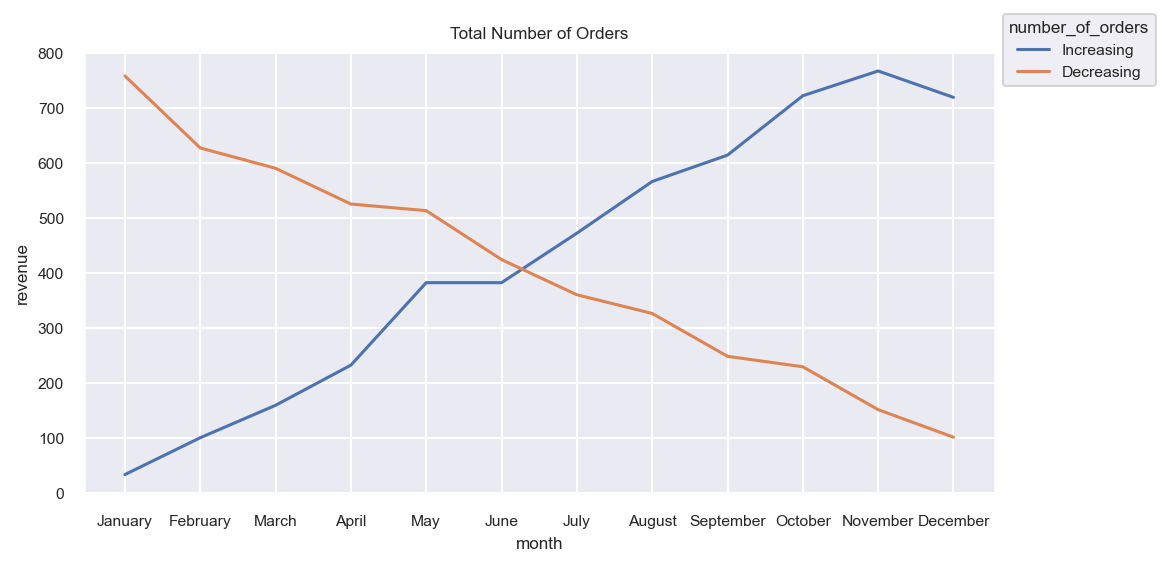

In [158]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.size, ci=None, ax=ax,
            hue='number_of_orders')
ax.set_title('Total Number of Orders')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

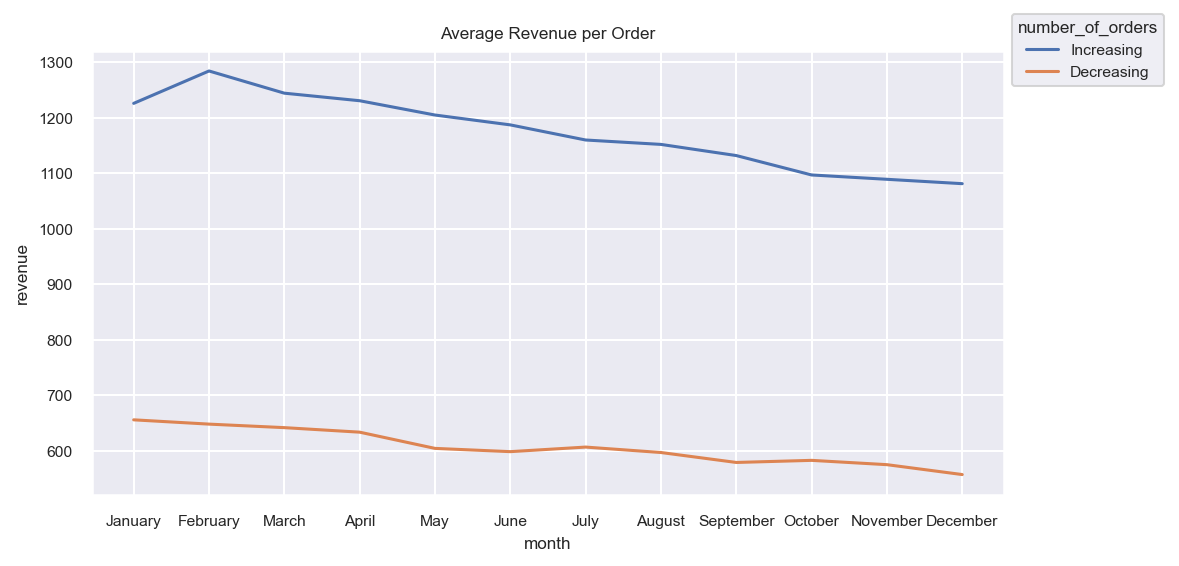

In [159]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='revenue', data=orders, estimator=np.mean, ci=None, ax=ax,
            hue='number_of_orders')
ax.set_title('Average Revenue per Order')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1.1))

## Color palettes

* Called [color maps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* Qualitative - coloring of categories with no inherent ordering (neighborhood, diamond shape)
* Sequential - coloring for numeric and categorical values with inherent ordering (price, carat, clarity)
* Diverging - coloring for numeric and categorical values where there is a midpoint and moving away from this midpoint in any direction makes it more extreme

### How to create and set color palettes

* View color palettes with `sns.color_palette`
* Create your own palettes with functions like `sns.husl_palette` or `sns.choose_*`
* Set `palette` parameter in seaborn plotting functions to color palette object or string name

### View color palettes with `sns.color_palette`

* Qualitative color palettes
    * Seaborn - **deep**, muted, bright, pastel, dark, colorblind
    * Matplotlib - **tab10**, Pastel1 Pastel2 Paired Accent Dark2 Set1 Set2 Set3 tab20 tab20b tab20c 

In [165]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

### Sequential color palettes

* Seaborn - rocket, mako, flare, crest
* Matplotlib - viridis, plasma, inferno, magma, cividis

In [171]:
sns.color_palette('GnBu', n_colors=20)

[(0.9346712802768166, 0.9749480968858132, 0.9101730103806228),
 (0.9007151095732411, 0.9616608996539792, 0.8791695501730104),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042),
 (0.8387543252595155, 0.9370703575547865, 0.8151787773933102),
 (0.8092272202998847, 0.9252595155709342, 0.7826989619377163),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.7058823529411765, 0.8849673202614379, 0.7307189542483661),
 (0.6512110726643598, 0.8637908496732026, 0.7123414071510957),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.5183391003460207, 0.8135947712418301, 0.7566320645905421),
 (0.4463667820069204, 0.7800076893502499, 0.7806228373702422),
 (0.37993079584775086, 0.7430988081507113, 0.8027681660899654),
 (0.31349480968858134, 0.7061899269511726, 0.8249134948096886),
 (0.2601307189542484, 0.6509803921568628, 0.7999999999999999),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.15247981545559403, 0.5324106113033449, 0.7367935409457901),
 (0.10080738177623991, 0.4792618223760092, 0.7102191464821223),
 (0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.03137254901960784, 0.3690888119953864, 0.6328489042675894),
 (0.03137254901960784, 0.31003460207612454, 0.5693656286043829)]

### Create your own color palettes

* `sns.husl_palette`
* `sns.choose_*`

In [183]:
p = sns.husl_palette(8, h=.9, s=.8, l=.7)
p

[(0.9359757773995121, 0.5215667803322613, 0.8268425813124103),
 (0.9442505310803535, 0.552246665486618, 0.5761610307606067),
 (0.8300807694152624, 0.6291173149296253, 0.29951780866015),
 (0.6142416653453464, 0.7007124129518665, 0.2976443874275649),
 (0.3061203196655298, 0.742241751274142, 0.5124112208290812),
 (0.32082524411474084, 0.7248079192386815, 0.7114500909630334),
 (0.3386815713788087, 0.7014768588303367, 0.8924167290005149),
 (0.7217488445961182, 0.6075143475535505, 0.932009722547899)]

<AxesSubplot:xlabel='carat', ylabel='price'>

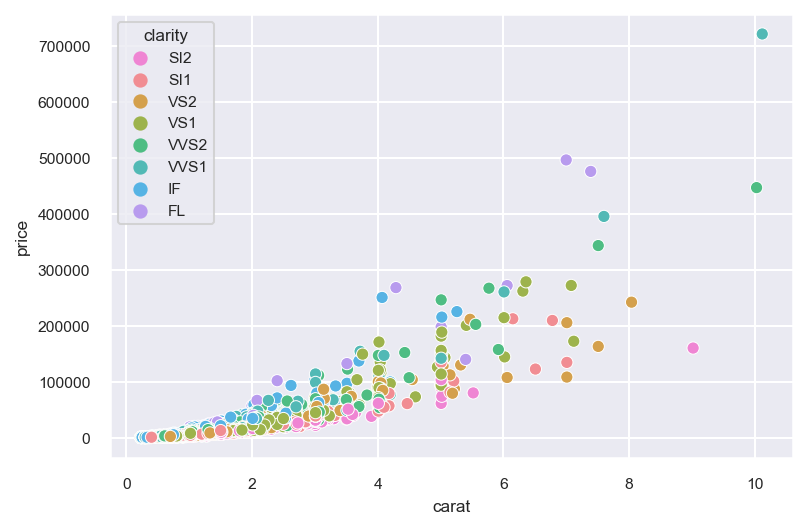

In [184]:
sns.scatterplot(x='carat', y='price', data=dia, hue='clarity', palette=p)

In [178]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [ ]:
sns.scatterplot()